In [1]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer
import torch

c:\Users\KHOULOUD TAOUCHIKHT\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = AutoModelForQuestionAnswering.from_pretrained('./cuad-models/roberta-base/')
tokenizer = AutoTokenizer.from_pretrained('./cuad-models/roberta-base/', use_fast=False)

In [4]:
import json

with open('./cuad-data/CUADv1.json') as json_file:
    data = json.load(json_file)

In [5]:
question = data['data'][0]['paragraphs'][0]['qas'][2]['question']
paragraph = ' '.join(data['data'][0]['paragraphs'][0]['context'].split()[:100])

In [6]:
encoding = tokenizer.encode_plus(text=question, text_pair=paragraph)
inputs = encoding['input_ids']
tokens = tokenizer.convert_ids_to_tokens(inputs)
outputs = model(input_ids=torch.tensor([inputs]))

start_scores = outputs.start_logits
end_scores = outputs.end_logits

Matplotlib is building the font cache; this may take a moment.
C:\Users\KHOULOUD TAOUCHIKHT\AppData\Local\Temp\ipykernel_15268\1744050503.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=token_labels[80:120], y=s_scores[80:120], ci=None)


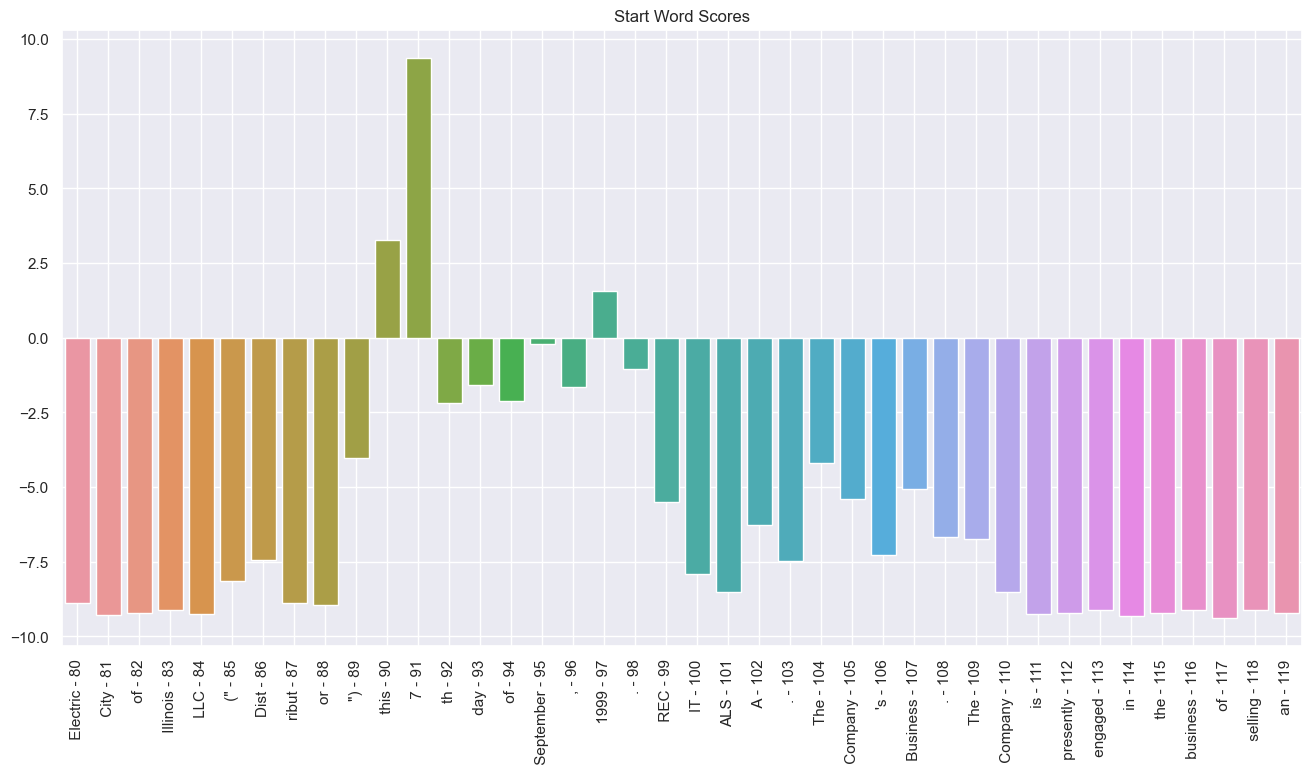

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)

# Pull the scores out of PyTorch Tensors and convert them to 1D numpy arrays.
s_scores = start_scores.detach().numpy().flatten()
e_scores = end_scores.detach().numpy().flatten()

# We'll use the tokens as the x-axis labels. In order to do that, they all need
# to be unique, so we'll add the token index to the end of each one.
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(tokenizer.convert_tokens_to_string(token), i))

# Create a barplot showing the start word score for all of the tokens.
ax = sns.barplot(x=token_labels[80:120], y=s_scores[80:120], ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('Start Word Scores')

plt.show()


C:\Users\KHOULOUD TAOUCHIKHT\AppData\Local\Temp\ipykernel_15268\1084413602.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=token_labels[80:120], y=e_scores[80:120], ci=None)


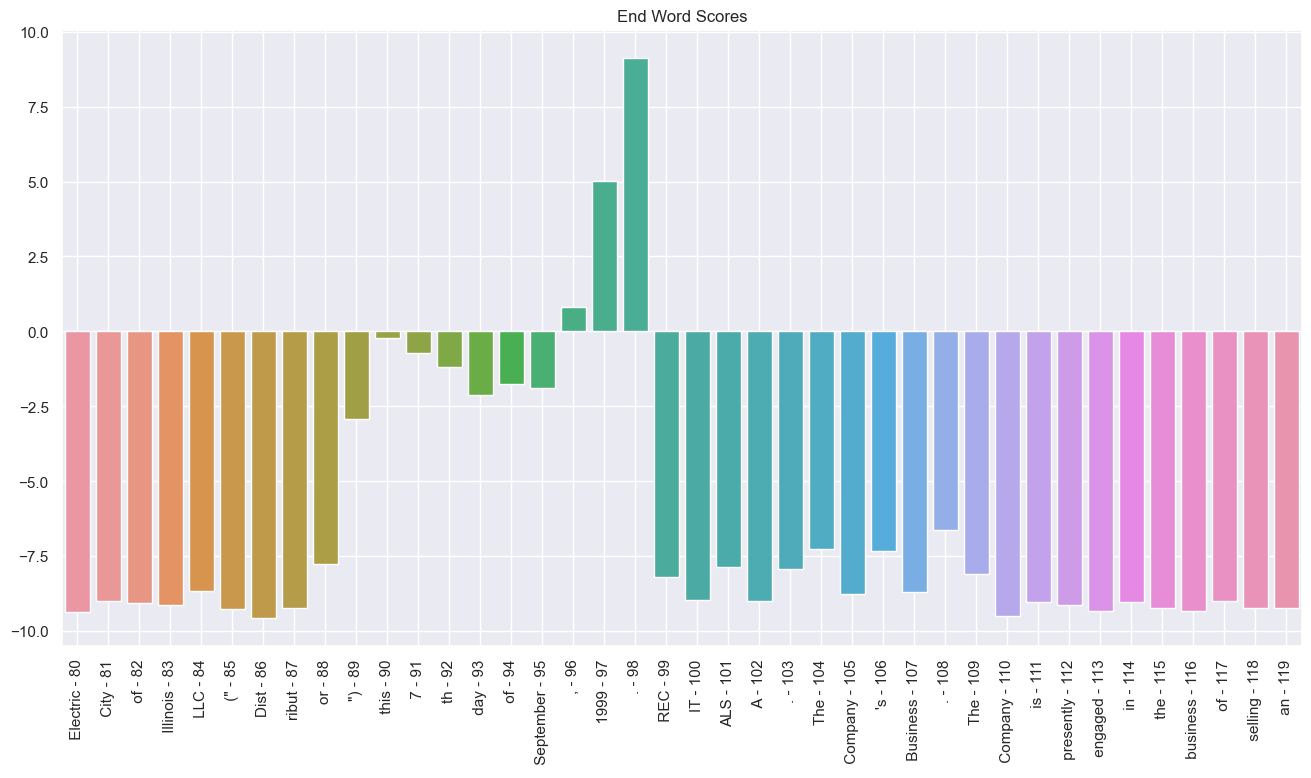

In [9]:
# Create a barplot showing the end word score for all of the tokens.
ax = sns.barplot(x=token_labels[80:120], y=e_scores[80:120], ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('End Word Scores')

plt.show()


In [10]:
start_index = torch.argmax(start_scores)
end_index = torch.argmax(end_scores)
answer = tokenizer.convert_tokens_to_string(tokens[start_index:end_index+1])
answer.strip()

'7th day of September, 1999.'